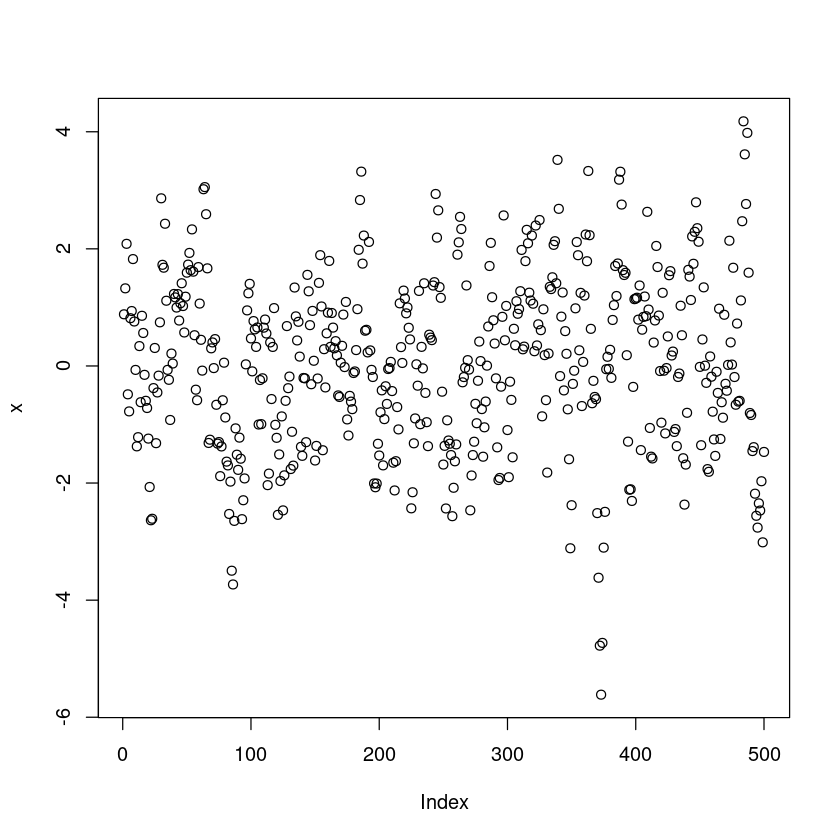

[1] "y ~ 0+k0+k1+k2+k3+k4+k5+k6+k7+k8+k9+k10+k11+k12+k13+k14+k15+k16+k17+k18+k19+k20"


Call:
lm(formula = frml, data = D)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.70509 -0.75973 -0.04296  0.64674  2.96550 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
k0   1.0153197  0.0451316  22.497  < 2e-16 ***
k1   0.8894702  0.0567965  15.661  < 2e-16 ***
k2   0.5843124  0.0569544  10.259  < 2e-16 ***
k3   0.5207157  0.0570188   9.132  < 2e-16 ***
k4   0.4231968  0.0567716   7.454 4.54e-13 ***
k5   0.3159790  0.0565993   5.583 4.06e-08 ***
k6   0.3342931  0.0567888   5.887 7.62e-09 ***
k7   0.1579797  0.0565852   2.792 0.005459 ** 
k8   0.2203060  0.0563735   3.908 0.000107 ***
k9   0.1483110  0.0563174   2.633 0.008737 ** 
k10  0.1339324  0.0562953   2.379 0.017763 *  
k11  0.0469586  0.0562978   0.834 0.404653    
k12  0.0423361  0.0564711   0.750 0.453823    
k13  0.0641791  0.0563830   1.138 0.255601    
k14  0.0167276  0.0568284   0.294 0.768621    
k15  0.0697608  0.0566057   1.232 0.218431    
k16  0.0005996  0.0567085   0.011 0.991568    

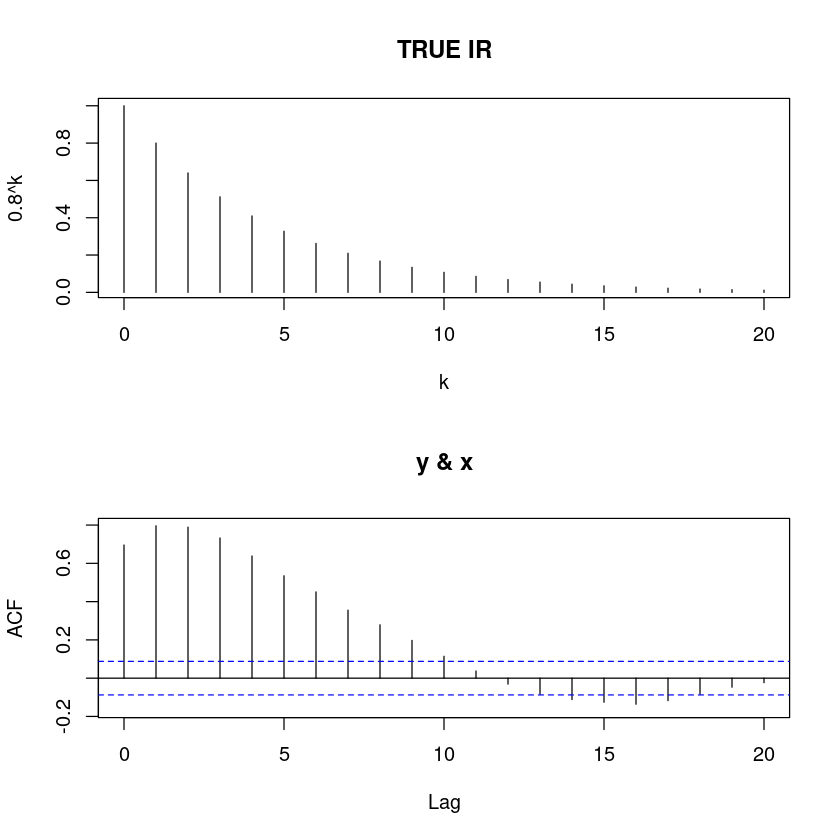

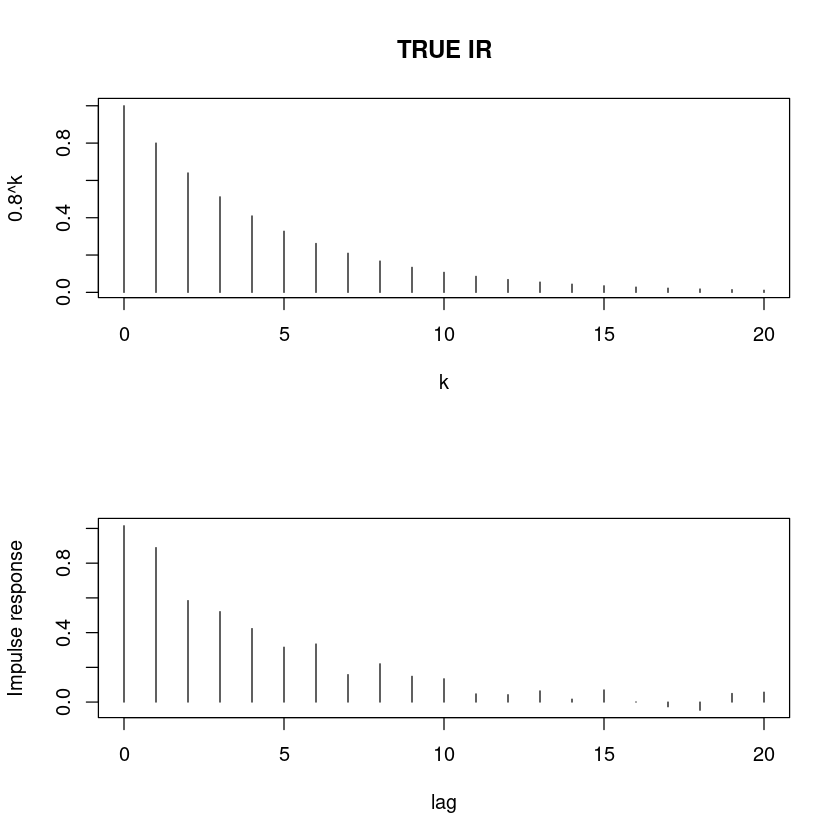

In [10]:
# Generate an AR(1) process as input
n <- 500
x <- c(arima.sim(list(ar=c(0.7,0,0)), n))
par(bg = "white")
plot(x)

# Make an output vector "filtered" by the system: y_t = 0.8 * y_{t-1} + x_t
y <- filter(x,0.8,"recursive") + rnorm(n)

# Calculate the true impulse response and plot with CCF
k <- 0:20
par(mfrow=c(2,1), bg = "white")
plot(k, 0.8^k, type="h", main="TRUE IR")
ccf(y,x, xlim=c(0,max(k)))

# Make lags for LS estimation
library(onlineforecast)
D <- as.data.frame(y=y, lagdf(x, k))
# See the model and the estimated result
(frml <- paste0("y ~ 0+",paste0("k",k,collapse="+")))
fit <- lm(frml, D)
summary(fit)

# Finally, Plot the true and the LS estimated IR
plot(k, 0.8^k, type="h", main="TRUE IR")
plot(0:20, fit$coef, type="h", xlab="lag", ylab="Impulse response")


